<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/DZ_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [100]:
import pandas as pd

Дані медичне страхування

In [101]:
# трохи обробки даних
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv')

df['sex'] = df['sex'].map({'male': 0, 'female':1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes':1})

df = df.drop(columns=['region'])

data = df[['age', 'bmi', 'expenses']]
df[['age', 'bmi', 'expenses']] = (data - data.min()) / (data.max() - data.min())

In [102]:
df.head()

,age,sex,bmi,children,smoker,expenses
0,0.021739,1,0.320755,0,1,0.251611
1,0.000000,0,0.479784,1,0,0.009636
2,0.217391,0,0.458221,3,0,0.053115
3,0.326087,0,0.180593,0,0,0.333010
4,0.304348,0,0.347709,0,0,0.043816


Потрібно на основі інформації людини спрогнозувати розмір її страховки `expenses`

# Завдання 1
Створіть клас Dataset

In [103]:
from torch.utils.data import Dataset
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

class MyDataset(Dataset):
    def __init__(self, X, y):
      self.X = torch.FloatTensor(X.values).to(device)
      self.y = torch.FloatTensor(y.values).to(device)
      self.y = self.y.reshape(-1, 1)

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

# Create dataset object
X = df.drop(columns=['expenses'])
y = df['expenses']

dataset = MyDataset(X, y)

# Завдання 2
Створіть DataLoader. Перевірте розміри даних в першому пакеті. Розмір пакетів оберіть самостійно

In [104]:
from torch.utils.data import DataLoader

batch_size = 10
dataloader = DataLoader(dataset,  # датасет з даними
                        batch_size=batch_size,  # кількість даних в одному пакеті
                        shuffle=True,  # чи треба перемішувати дані
                        generator=torch.Generator(device=device))

In [105]:
X_batch, y_batch = next(iter(dataloader))

In [106]:
X_batch.shape

torch.Size([10, 5])

In [107]:
y_batch.shape

torch.Size([10, 1])

# Завдання 3
Створіть нейромережу:
* Кількість шарів оберіть між 1-5
* Виберіть різні функції активації: Relu, LeakyRelu, Swish
* Кілкість нейронів у прихованих шарах повинна **не зростати**

In [108]:
from torch import nn


model = nn.Sequential(
    nn.Linear(5, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.LeakyReLU(),
    nn.Linear(4,3),
    nn.ReLU(),
    nn.Linear(3,2),
    nn.ReLU(),
    nn.Linear(2,2),
    nn.ReLU(),
    nn.Linear(2,1),
)

model

Sequential(
  (0): Linear(in_features=5, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=2, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2, out_features=2, bias=True)
  (9): ReLU()
  (10): Linear(in_features=2, out_features=1, bias=True)
)

In [109]:
X_batch

tensor([[0.0000, 1.0000, 0.1294, 0.0000, 0.0000],
        [0.9348, 0.0000, 0.7385, 0.0000, 0.0000],
        [0.7391, 1.0000, 0.2507, 2.0000, 1.0000],
        [0.7391, 1.0000, 0.2399, 0.0000, 0.0000],
        [0.9130, 1.0000, 0.3127, 0.0000, 0.0000],
        [0.6522, 0.0000, 0.3827, 2.0000, 0.0000],
        [0.9783, 1.0000, 0.5633, 0.0000, 0.0000],
        [0.3478, 1.0000, 0.3100, 1.0000, 0.0000],
        [0.2609, 0.0000, 0.3423, 3.0000, 1.0000],
        [0.7391, 0.0000, 0.2237, 3.0000, 1.0000]])

# Завдання 4
Визначте функцію втрат та оптимізатор

In [110]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Завдання 5
Натренуйте нейромережу. візміть невелику кількість епох

In [111]:
import numpy as np

num_epochs = 20
losses = []

for epoch in range(num_epochs):
  losses_ = []
  for X_batch, y_batch in dataloader:
        # пряме пошерення
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        losses_.append(loss.item())

        # Зворотнє поширення
        loss.backward() # рахуємо градієнти
        optimizer.step()
        optimizer.zero_grad()

  losses.append(np.mean(losses_))

  if epoch % 1 == 0:
          print(f'loss={losses[-1]}')

loss=0.12222276742000189
loss=0.08687658154808764
loss=0.06633250659623587
loss=0.05429508589701588
loss=0.04728277556167276
loss=0.043123799789724734
loss=0.040689567402839216
loss=0.03935865075118951
loss=0.038453369759329
loss=0.03798571967436418
loss=0.037699720756248084
loss=0.0375397829703792
loss=0.03750479144197124
loss=0.037404427565495245
loss=0.037476055240675585
loss=0.03734369491532778
loss=0.03737518415480519
loss=0.037377812364486174
loss=0.03733895654414794
loss=0.03731909779303554


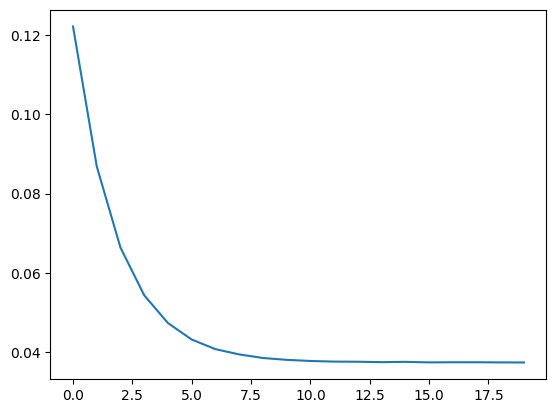

In [112]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [113]:
y_pred = model(dataset.X)
y_true = dataset.y

r2 = 1 - loss_fn(y_pred, y_true) / torch.mean((y_true - torch.mean(y_true))**2)
r2

tensor(-7.2718e-05, grad_fn=<RsubBackward1>)

# Завдання 6
Збережіть нейромережу та зробіть прогноз

In [114]:
torch.save(model, 'model.pt')

In [115]:
load_model = torch.load('model.pt')

<ipython-input-115-2cff9b381423>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model = torch.load('model.pt')


In [116]:
load_model

Sequential(
  (0): Linear(in_features=5, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=2, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2, out_features=2, bias=True)
  (9): ReLU()
  (10): Linear(in_features=2, out_features=1, bias=True)
)

In [117]:
X.iloc[:1]

,age,sex,bmi,children,smoker
0,0.021739,1,0.320755,0,1


In [118]:
X_data = torch.FloatTensor(X.iloc[:1].values)
X_data = X_data.to(device)

print(X_data)
print(X_data.shape)

tensor([[0.0217, 1.0000, 0.3208, 0.0000, 1.0000]])
torch.Size([1, 5])


In [119]:
load_model(X_data) # порахує грабієнти

tensor([[0.1923]], grad_fn=<AddmmBackward0>)

In [120]:
with torch.no_grad(): # без градієнтів
  print(load_model(X_data))

tensor([[0.1923]])
